# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **sticking to the submission structure** (see below). This is especially true for the submission of your predictions and your textual answer.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [13]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from utils.plotter import plot_SVM_DecisionBoundary

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [2]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:
data_path_train = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv')
data_path_test = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
data_path_val = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
image_C_train = pd.read_csv(data_path_train)
image_C_test = pd.read_csv(data_path_test)
image_C_val = pd.read_csv(data_path_val)

print(image_C_train.shape)
print(image_C_test.shape)
print(image_C_val.shape)

(2113, 520)
(1114, 501)
(1113, 520)


In [3]:
# split data into X and y
X_train = image_C_train[image_C_train.columns[1:501]]
y_train = image_C_train['is_person']
X_val = image_C_val[image_C_val.columns[1:501]]
y_val = image_C_val['is_person']
X_test = image_C_test[image_C_test.columns[0:500]]
y_test = image_C_test['is_person']

In [4]:
# pre-processing the data
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

In [21]:
# logistic regression

C = np.logspace(-5,5,11)
#C = np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 1e4, 1e5])
N = len(C)
scores = [0 for x in range(N)]
for i, para in enumerate (C):
    logisticRegr = LogisticRegression(solver='lbfgs', C = para)
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores[i] = cross_val_score(logisticRegr, X_tr_sc, y_train, cv=cv)
    print(para, "\n", scores[i])


1e-05 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.0001 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.001 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.01 
 [0.55791962 0.56973995 0.54609929 0.52369668 0.55924171]
0.1 
 [0.55555556 0.57210402 0.54846336 0.52369668 0.55924171]
1.0 
 [0.62411348 0.62884161 0.58156028 0.54976303 0.59478673]
10.0 
 [0.6501182  0.73758865 0.62174941 0.63744076 0.65876777]
100.0 
 [0.66666667 0.73286052 0.6501182  0.66587678 0.69194313]
1000.0 
 [0.65248227 0.75886525 0.66193853 0.65165877 0.68483412]
10000.0 
 [0.66666667 0.73995272 0.6501182  0.6563981  0.70616114]
100000.0 
 [0.65484634 0.74468085 0.63120567 0.65165877 0.71090047]


In [13]:
np.mean(scores, axis=1)

array([0.55181226, 0.55181226, 0.55181226, 0.55133945, 0.55181226,
       0.59581303, 0.66113296, 0.68149306, 0.68195579, 0.68385937,
       0.67865842])

In [8]:
logisticRegr = LogisticRegression(solver='lbfgs', C = 10000)
logisticRegr.fit(X_val, y_val)
pred = logisticRegr.predict(X_val_sc)
accuracy_score(y_val, pred)


0.6981132075471698

In [ ]:
# plot
mean = [0 for x in range(N)]
sd = [0 for x in range(N)]
for ii in range(N):
    mean[ii] = np.mean(scores[ii])
    sd[ii] = np.std(scores[ii])
    

plt.figure()
plt.errorbar(x = C, y = mean, yerr = sd, fmt = '--o', ecolor = 'r', capthick = 2)
plt.xscale('log')
plt.xticks(C)
plt.title("The accuracy against different values of parameter C")
plt.show()

idx = sorted(range(len(mean)), key=lambda k: mean[k])
optim = C[idx[-1]]
op_acc = mean[idx[-1]]
print("The optimal value for the parameter C is: ", optim, ", with the best accuracy of ", op_acc)

In [6]:
# different solver
C = np.logspace(-5,5,11)
#C = np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 1e4, 1e5])
N = len(C)
scores = [0 for x in range(N)]
for i, para in enumerate (C):
    logisticRegr = LogisticRegression(solver='newton-cg', C = para)
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores[i] = cross_val_score(logisticRegr, X_tr_sc, y_train, cv=cv)
    print(para, "\n", scores[i])

1e-05 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.0001 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.001 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.01 
 [0.55791962 0.56973995 0.54609929 0.52369668 0.55924171]
0.1 
 [0.55555556 0.57210402 0.54846336 0.52369668 0.55924171]
1.0 
 [0.62411348 0.63120567 0.58156028 0.54976303 0.59478673]
10.0 
 [0.65248227 0.73286052 0.62174941 0.63270142 0.66350711]
100.0 
 [0.6643026  0.75413712 0.6713948  0.66587678 0.68483412]
1000.0 
 [0.69030733 0.73286052 0.6643026  0.65402844 0.67535545]
10000.0 
 [0.64539007 0.69503546 0.66193853 0.66587678 0.6492891 ]
100000.0 
 [0.64066194 0.70449173 0.66193853 0.63981043 0.62796209]


In [7]:
np.mean(scores, axis=1)

array([0.55181226, 0.55181226, 0.55181226, 0.55133945, 0.55181226,
       0.59628584, 0.66066015, 0.68810908, 0.68337087, 0.66350599,
       0.65497294])

In [9]:
logisticRegr = LogisticRegression(solver='newton-cg', C = 100)
logisticRegr.fit(X_tr_sc, y_train)
pred = logisticRegr.predict(X_val_sc)
accuracy_score(y_val, pred)

0.6891284815813118

In [10]:
C = np.logspace(-5,5,11)
#C = np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 1e4, 1e5])
N = len(C)
scores = [0 for x in range(N)]
for i, para in enumerate (C):
    linear_SVM = SVC(C=para, kernel='linear')
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores[i] = cross_val_score(linear_SVM, X_train, y_train, cv=cv)
    print(para, "\n", scores[i])

1e-05 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.0001 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.001 
 [0.55791962 0.57210402 0.54609929 0.52369668 0.55924171]
0.01 
 [0.55791962 0.56973995 0.54609929 0.52369668 0.55924171]
0.1 
 [0.55791962 0.57210402 0.55082742 0.52606635 0.55924171]
1.0 
 [0.55791962 0.57210402 0.54846336 0.52606635 0.55924171]
10.0 
 [0.64066194 0.6501182  0.62174941 0.58293839 0.62559242]
100.0 
 [0.68085106 0.75886525 0.6643026  0.66824645 0.69905213]
1000.0 
 [0.6643026  0.75177305 0.65957447 0.66587678 0.67535545]
10000.0 
 [0.64066194 0.69739953 0.66193853 0.65876777 0.63507109]
100000.0 
 [0.63120567 0.67612293 0.65957447 0.6492891  0.63744076]


In [11]:
np.mean(scores, axis=1)

array([0.55181226, 0.55181226, 0.55181226, 0.55133945, 0.55323182,
       0.55275901, 0.62421207, 0.6942635 , 0.68337647, 0.65876777,
       0.65072659])

In [12]:
linear_SVM = SVC(C=100, kernel='linear')
linear_SVM.fit(X_train, y_train)
pred = linear_SVM.predict(X_val)
accuracy_score(y_val, pred)

0.6945193171608266

In [16]:
deg=[2,3,4]
deg[1]

3

In [18]:
C = np.logspace(-2,3,6)
deg = [2,3,4,5]
length = len(C) * len(deg)
feature_list=['C','degree','acc']
df = pd.DataFrame(0, index=np.arange(length), columns=feature_list, dtype=float)

n = 0
for i in range(len(C)):
    for j in range(len(deg)):
        poly_SVM = SVC(C=C[i], kernel='poly', degree=deg[j])
        scores = cross_val_score(poly_SVM, X_train, y_train, cv=cv)
        df.iloc[n]['C'] = C[i]
        df.iloc[n]['degree'] = deg[j]
        df.iloc[n]['acc'] = np.mean(scores)
        n += 1
        print("C = ", C[i], "degree = ", deg[j], "accuracy = ", np.mean(scores))

C =  0.01 degree =  2 accuracy =  0.5518122640135346
C =  0.01 degree =  3 accuracy =  0.5518122640135346
C =  0.01 degree =  4 accuracy =  0.5518122640135346
C =  0.01 degree =  5 accuracy =  0.5518122640135346
C =  0.1 degree =  2 accuracy =  0.5518122640135346
C =  0.1 degree =  3 accuracy =  0.5518122640135346
C =  0.1 degree =  4 accuracy =  0.5518122640135346
C =  0.1 degree =  5 accuracy =  0.5518122640135346
C =  1.0 degree =  2 accuracy =  0.5518122640135346
C =  1.0 degree =  3 accuracy =  0.5518122640135346
C =  1.0 degree =  4 accuracy =  0.5518122640135346
C =  1.0 degree =  5 accuracy =  0.5518122640135346
C =  10.0 degree =  2 accuracy =  0.5518122640135346
C =  10.0 degree =  3 accuracy =  0.5518122640135346
C =  10.0 degree =  4 accuracy =  0.5518122640135346
C =  10.0 degree =  5 accuracy =  0.5518122640135346
C =  100.0 degree =  2 accuracy =  0.5518122640135346
C =  100.0 degree =  3 accuracy =  0.5518122640135346
C =  100.0 degree =  4 accuracy =  0.551812264013534

In [19]:
max(df['acc'])

0.5518122640135346

In [20]:
C = np.logspace(-2,3,6)
deg = np.linspace(1, 5, 5)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

length = len(C) * len(deg)
feature_list=['C','Degree','acc']
df = pd.DataFrame(0, index=np.arange(length), columns=feature_list, dtype=float)

n = 0
for i in range(len(C)):
    for j in range(len(deg)):
        poly_SVM = SVC(C=C[i], kernel='poly', degree=deg[j])
        scores = cross_val_score(poly_SVM, X_train, y_train, cv=cv)
        df.iloc[n]['C'] = C[i]
        df.iloc[n]['Degree'] = deg[j]
        df.iloc[n]['acc'] = np.mean(scores)
        n += 1
        print("C = ", C[i], "degree = ", deg[j], "accuracy = ", np.mean(scores))

C =  0.01 degree =  1.0 accuracy =  0.5518122640135346
C =  0.01 degree =  2.0 accuracy =  0.5518122640135346
C =  0.01 degree =  3.0 accuracy =  0.5518122640135346
C =  0.01 degree =  4.0 accuracy =  0.5518122640135346
C =  0.01 degree =  5.0 accuracy =  0.5518122640135346
C =  0.1 degree =  1.0 accuracy =  0.5518122640135346
C =  0.1 degree =  2.0 accuracy =  0.5518122640135346
C =  0.1 degree =  3.0 accuracy =  0.5518122640135346
C =  0.1 degree =  4.0 accuracy =  0.5518122640135346
C =  0.1 degree =  5.0 accuracy =  0.5518122640135346
C =  1.0 degree =  1.0 accuracy =  0.551339450774764
C =  1.0 degree =  2.0 accuracy =  0.5518122640135346
C =  1.0 degree =  3.0 accuracy =  0.5518122640135346
C =  1.0 degree =  4.0 accuracy =  0.5518122640135346
C =  1.0 degree =  5.0 accuracy =  0.5518122640135346
C =  10.0 degree =  1.0 accuracy =  0.551339450774764
C =  10.0 degree =  2.0 accuracy =  0.5518122640135346
C =  10.0 degree =  3.0 accuracy =  0.5518122640135346
C =  10.0 degree =  4.

In [12]:
C = np.logspace(-2,3,6)
gam = np.logspace(-2,3,6)

length = len(C) * len(gam)
feature_list=['C','gamma','acc']
df = pd.DataFrame(0, index=np.arange(length), columns=feature_list, dtype=float)

n = 0
for i in range(len(C)):
    for j in range(len(gam)):
        rbf_SVM = SVC(C=C[i], kernel='rbf', gamma=gam[j])
        scores = cross_val_score(rbf_SVM, X_tr_sc, y_train, cv=cv)
        df.iloc[n]['C'] = C[i]
        df.iloc[n]['gamma'] = gam[j]
        df.iloc[n]['acc'] = np.mean(scores)
        n += 1
        print("C = ", C[i], "gamma = ", gam[j], "accuracy = ", np.mean(scores))

C =  0.01 gamma =  0.01 accuracy =  0.5518122640135346
C =  0.01 gamma =  0.1 accuracy =  0.5518122640135346
C =  0.01 gamma =  1.0 accuracy =  0.5518122640135346
C =  0.01 gamma =  10.0 accuracy =  0.5518122640135346
C =  0.01 gamma =  100.0 accuracy =  0.5518122640135346
C =  0.01 gamma =  1000.0 accuracy =  0.5518122640135346
C =  0.1 gamma =  0.01 accuracy =  0.5518122640135346
C =  0.1 gamma =  0.1 accuracy =  0.5518122640135346
C =  0.1 gamma =  1.0 accuracy =  0.5518122640135346
C =  0.1 gamma =  10.0 accuracy =  0.5589055830056132
C =  0.1 gamma =  100.0 accuracy =  0.6682330005714094
C =  0.1 gamma =  1000.0 accuracy =  0.5518122640135346
C =  1.0 gamma =  0.01 accuracy =  0.5518122640135346
C =  1.0 gamma =  0.1 accuracy =  0.5518122640135346
C =  1.0 gamma =  1.0 accuracy =  0.5660033836397657
C =  1.0 gamma =  10.0 accuracy =  0.682436444713343
C =  1.0 gamma =  100.0 accuracy =  0.7009008100568048
C =  1.0 gamma =  1000.0 accuracy =  0.6157047942366083
C =  10.0 gamma =  0

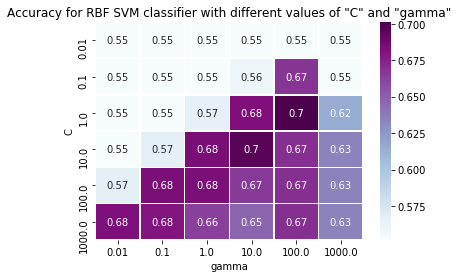

In [50]:
# heatmap of the C and gamma
data = df.pivot('C', 'gamma', 'acc')
ax = sns.heatmap(data, annot=True, linewidths=.5, cmap = 'BuPu')
ax.set_title('Accuracy for RBF SVM classifier with different values of "C" and "gamma"')
plt.show()

In [13]:
# perform the hyperparameters that give the best result on the validation set with Kfold
cv = KFold(n_splits=5, random_state=0, shuffle=True)

rbf_SVM = SVC(C=1, kernel='rbf', gamma=100)
scores = cross_val_score(rbf_SVM, X_val, y_val, cv=cv)
np.mean(scores)

0.6729770128873267

In [24]:
# perform the hyperparameters that give the best result on the validation set
rbf_SVM_op = SVC(C=1, kernel='rbf', gamma=100, probability=True)
rbf_SVM_op.fit(X_train, y_train)
pred = rbf_SVM_op.predict(X_val)
accuracy_score(y_val, pred)
pred_probabilities = rbf_SVM_op.predict_proba(X_test)
pred_probabilities

array([[0.85564904, 0.14435096],
       [0.88150281, 0.11849719],
       [0.46512838, 0.53487162],
       ...,
       [0.5386664 , 0.4613336 ],
       [0.6207361 , 0.3792639 ],
       [0.34390364, 0.65609636]])

In [23]:
C = np.logspace(-2,3,6)
gam = np.logspace(-2,3,6)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

length = len(C) * len(gam)
feature_list=['C','Degree','acc']
df = pd.DataFrame(0, index=np.arange(length), columns=feature_list, dtype=float)

n = 0
for i in range(len(C)):
    for j in range(len(gam)):
        rbf_SVM = SVC(C=C[i], kernel='poly', gamma=gam[j])
        scores = cross_val_score(rbf_SVM, X_tr_sc, y_train, cv=cv)
        df.iloc[n]['C'] = C[i]
        df.iloc[n]['gamma'] = gam[j]
        df.iloc[n]['accuracy'] = np.mean(scores)
        n += 1
        print("C = ", C[i], "gamma = ", gam[j], "accuracy = ", np.mean(scores))


C =  0.01 gamma =  0.01 accuracy =  0.551339450774764
C =  0.01 gamma =  0.1 accuracy =  0.5532318241403651
C =  0.01 gamma =  1.0 accuracy =  0.5532318241403651
C =  0.01 gamma =  10.0 accuracy =  0.6791133071157271
C =  0.01 gamma =  100.0 accuracy =  0.6374889359461307
C =  0.01 gamma =  1000.0 accuracy =  0.6365421890580709
C =  0.1 gamma =  0.01 accuracy =  0.5527578904910759
C =  0.1 gamma =  0.1 accuracy =  0.5532318241403651
C =  0.1 gamma =  1.0 accuracy =  0.6535567431907052
C =  0.1 gamma =  10.0 accuracy =  0.6559297726687058
C =  0.1 gamma =  100.0 accuracy =  0.6370138818863231
C =  0.1 gamma =  1000.0 accuracy =  0.6365421890580709
C =  1.0 gamma =  0.01 accuracy =  0.5532318241403651
C =  1.0 gamma =  0.1 accuracy =  0.5532318241403651
C =  1.0 gamma =  1.0 accuracy =  0.6933145104366238
C =  1.0 gamma =  10.0 accuracy =  0.6493103873259163
C =  1.0 gamma =  100.0 accuracy =  0.6370138818863231
C =  1.0 gamma =  1000.0 accuracy =  0.6365421890580709
C =  10.0 gamma =  0

#ANSWER_TEXT#

***Your answer goes here:***

Several classifiers are used including Logistic Regression classifier, linear kernel SVM, polynomial kernel SVM and RBF kernel SVM. The five-fold cross validation method is applied to all the training process. Efforts have been paid to search the optimal parameter for each model using the training set and the model achieved the highest accuracy on the validation set is chosen.

We used to use linear classifier where the decision boundary is a line. Now we want a want a linear, probabilistic model. We can use logistic function to squash the real line into [0, 1] and return us a probability. The logistic model uses a logistic function to model a binary dependent variable. This method is a discriminative approach which is good with missing data and detecting outliers. First, I set the range of C from 10^(-5) to 10^5 and train the Logistic Regression classifier on the training set and choose the value of C that gives me the highest accuracy on the training set. For the “lbfgs” solver, the optimal C is 10000 and the corresponding accuracy on the validation set is 0.698. For “newton-cg” solver, the optimal C is 100 and the corresponding accuracy on the validation set is 0.689. The parameter C is the inverse of regularization strength. The smaller value of C specifies stronger regularization. So, the larger the value of C, the more likely the model becomes overfitting. We should choose a reasonably small value for C. 

SVM is a linear classifier and it draws the separating hyperplane with maximum margin. The margin is the distance between the decision boundary (the hyperplane) and the closest training point. When using “linear” kernel, the parameter C is set within range from 10^(-5) to 10^5 and the optimal value of C for the “linear” kernel is 100 and the accuracy achieved on the training set is 0.695. For “poly” kernel, the parameter “C” and “degree” are searched together. The highest accuracy is 0.55 for several combinations of “C” and “degree”. For the default “rbf” kernel, the parameter “C” and “gamma” are searched together, a heatmap is generated. The optimal combination is C=1, gamma=100. And this method and setting gives the highest accuracy achieved on the training set which is 0.70. Then I test this model on the validation set, and the resulted accuracy is 0.71. The final model I choose is SVM classifier with “rbf” classifier, C=1, gamma=100. The predicted probabilities of this model is shown in the cell below.




In [25]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.85564904, 0.14435096
0.88150281, 0.11849719
0.46512838, 0.53487162
0.43538101, 0.56461899
0.77084077, 0.22915923
0.12484180, 0.87515820
0.30087997, 0.69912003
0.20308042, 0.79691958
0.78713581, 0.21286419
0.75313077, 0.24686923
0.40829621, 0.59170379
0.75267760, 0.24732240
0.59321590, 0.40678410
0.65611261, 0.34388739
0.07119350, 0.92880650
0.58780036, 0.41219964
0.11458184, 0.88541816
0.62766566, 0.37233434
0.82439618, 0.17560382
0.48701333, 0.51298667
0.76119975, 0.23880025
0.54946661, 0.45053339
0.64717213, 0.35282787
0.48978822, 0.51021178
0.79309785, 0.20690215
0.11498525, 0.88501475
0.23240389, 0.76759611
0.76550380, 0.23449620
0.35323522, 0.64676478
0.41451724, 0.58548276
0.75921700, 0.24078300
0.51416182, 0.48583818
0.88514914, 0.11485086
0.62693382, 0.37306618
0.70698955, 0.29301045
0.42229635, 0.57770365
0.18483606, 0.81516394
0.79104489, 0.20895511
0.85973795, 0.14026205
0.65161159, 0.34838841
0.76239827, 0.23760173
0.53271977, 0.46728023
0.58203858, 0.41796142
0.87112877,